In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,7)
import seaborn as sns

%matplotlib inline

In [ ]:
# Suppress warning
import warnings
warnings.filterwarnings("ignore")

# Enable code autocompletion
%config Completer.use_jedi = False

In [ ]:
# Initialization of random state parameter in estimators and CV splitters
#rng= np.random.RandomState(0)
rng = 42

#### Loading Data

In [ ]:
df_sample = pd.read_csv("/content/sample.csv")

In [ ]:
df_test = pd.read_csv("/content/test_data_v2.csv")

In [ ]:
df_train = pd.read_csv("/content/train_data_v2.csv")

#### Exploratory Data Analysis

In [ ]:
df_train.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

- 14731 entries, 22 columns including label
- Missing values in most columns
- 15 numerical and 6 categorical columns

In [ ]:
df_train.dtypes.value_counts()

float64    15
object      6
bool        1
dtype: int64

In [ ]:
df_train.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [ ]:
df_train.columns = df_train.columns.str.replace(' ', "_")
df_test.columns = df_test.columns.str.replace(' ', '_')
df_train.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce_Rates', 'GoogleMetric:Exit_Rates',
       'GoogleMetric:Page_Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type_of_Traffic', 'CustomerType', 'Gender', 'Cookies_Setting',
       'Education', 'Marital_Status', 'WeekendPurchase', 'Made_Purchase'],
      dtype='object')

Drop duplicate values

In [ ]:
df_train.duplicated().sum()

1

In [ ]:
df_train = df_train.drop_duplicates()

In [ ]:
df_train.shape

(14730, 22)

#### Labels

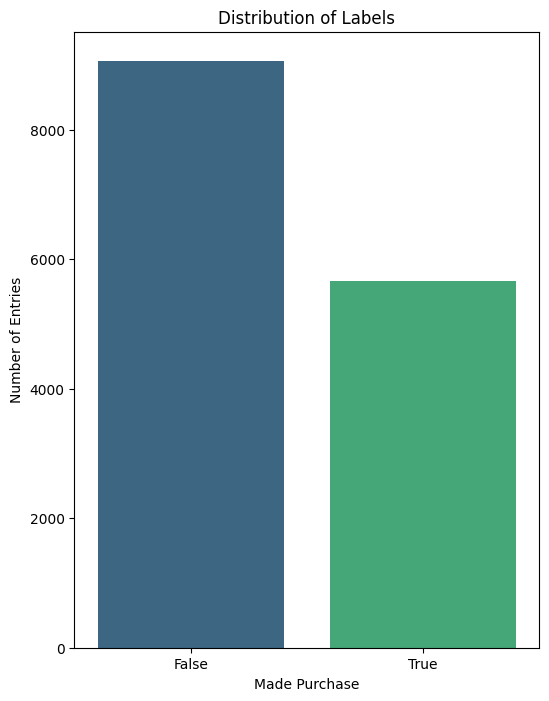

In [ ]:
plt.figure(figsize= (6,8))

# plotting the counts of each binary class label
sns.countplot(data= df_train, x= 'Made_Purchase', palette= 'viridis')

plt.title('Distribution of Labels')
plt.xlabel('Made Purchase')
plt.ylabel('Number of Entries')
plt.show()



In [ ]:
made_purchase_yes = df_train["Made_Purchase"].value_counts().iloc[1]/df_train.shape[0]
made_purchase_no = df_train["Made_Purchase"].value_counts().iloc[0]/df_train.shape[0]

print('Percentage of made purchase: ', round(made_purchase_yes*100,2))
print('Percentage of not made purchase: ', round(made_purchase_no*100,2))


Percentage of made purchase:  38.47
Percentage of not made purchase:  61.53


There is class imbalance in the problem

#### Feature Matrix and Label Vector

In [ ]:
X = df_train.drop(['Made_Purchase'], axis= 1)
y = df_train['Made_Purchase']


In [ ]:
print(X.shape, y.shape)

(14730, 21) (14730,)


Separating categorical and numerical columns

In [ ]:
cat_cols = X.select_dtypes(include= 'object').columns.to_list()
num_cols = X.select_dtypes(exclude= 'object').columns.to_list()

Categorical Features

In [ ]:
cat_cols

['Month_SeasonalPurchase',
 'CustomerType',
 'Gender',
 'Cookies_Setting',
 'Education',
 'Marital_Status']

In [ ]:
X[cat_cols].nunique().sort_values()

CustomerType               3
Gender                     3
Cookies_Setting            3
Marital_Status             3
Education                  4
Month_SeasonalPurchase    10
dtype: int64

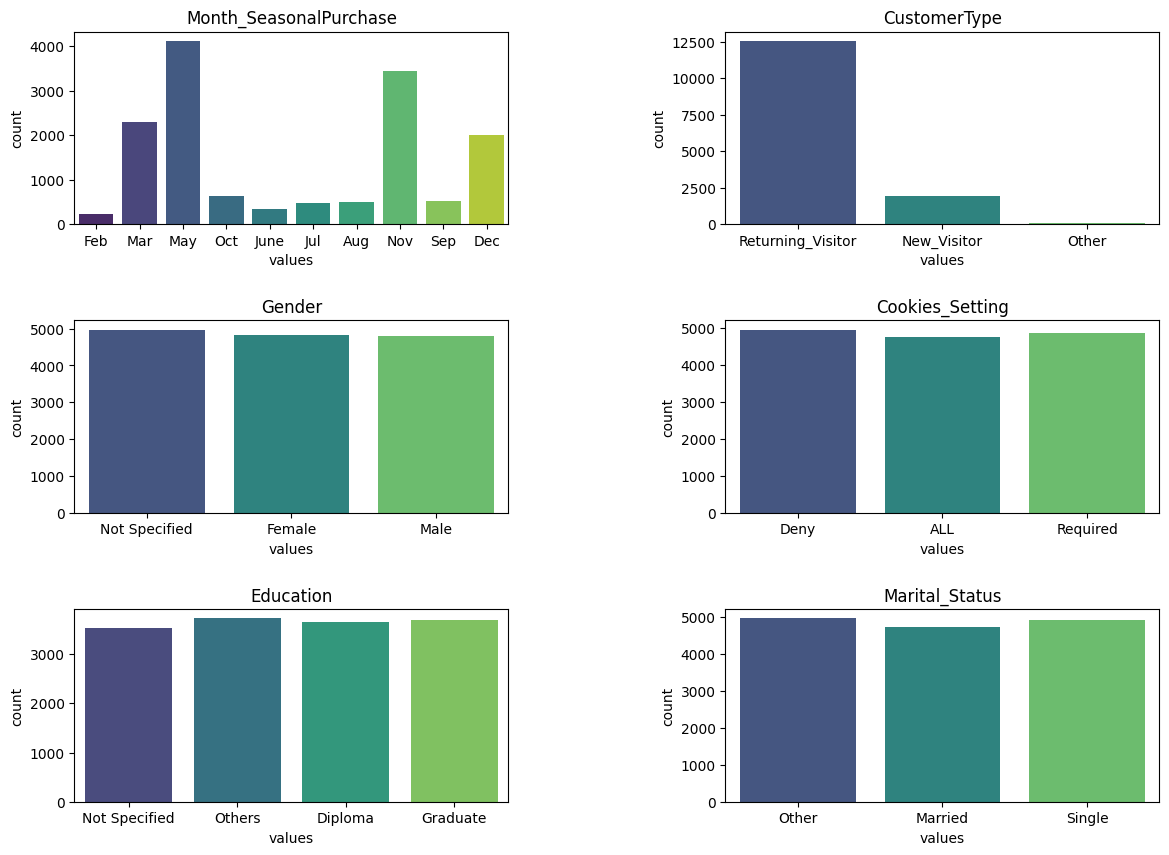

In [ ]:
# Distribution of categorical features

fig = plt.figure(figsize=(14,10))

for i, feature in enumerate(cat_cols):
    ax = plt.subplot(3,2,i+1)
    sns.countplot(data=X, x=feature, palette="viridis", ax=ax)
    plt.xlabel("values")
    plt.title(feature)
plt.subplots_adjust(wspace=0.5, hspace=0.5)    

- Month_SeasonalPurchase has high variability.
- Do Feature Engineering of Month_SeasonalPurchase 

In [ ]:
X["Month_SeasonalPurchase"] = X["Month_SeasonalPurchase"].map(
                  {"Oct": "Winter", 
                   "Nov": "Winter", 
                   "Dec": "Winter", 
                   "Feb": "Winter", 
                   "Mar": "Summer", 
                   "May": "Summer",
                   "Jun": "Summer",
                   "Jul": "Monsoon",
                   "Aug": "Monsoon",
                   "Sep": "Monsoon"})

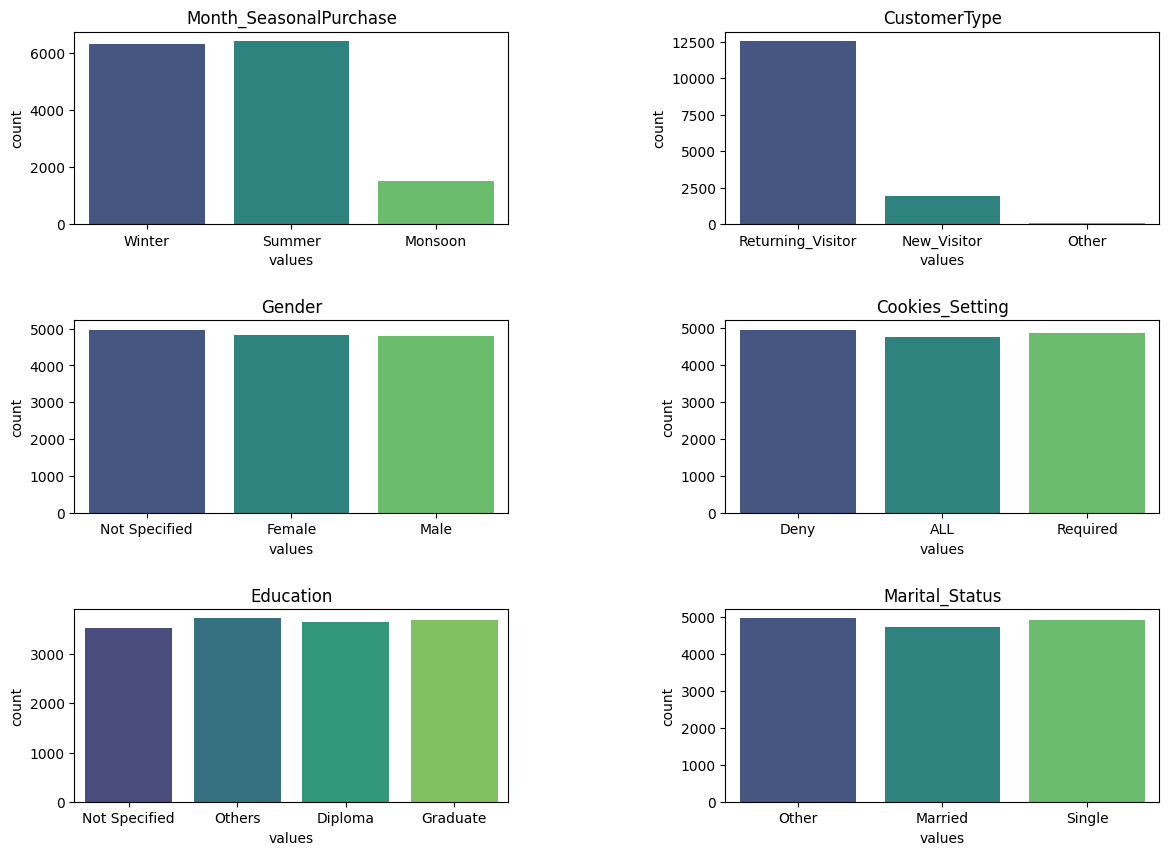

In [ ]:
# Distribution of categorical features

fig = plt.figure(figsize=(14,10))

for i, feature in enumerate(cat_cols):
    ax = plt.subplot(3,2,i+1)
    sns.countplot(data=X, x=feature, palette="viridis", ax=ax)
    plt.xlabel("values")
    plt.title(feature)
plt.subplots_adjust(wspace=0.5, hspace=0.5)   

Numerical Features

In [ ]:
num_cols

['HomePage',
 'HomePage_Duration',
 'LandingPage',
 'LandingPage_Duration',
 'ProductDescriptionPage',
 'ProductDescriptionPage_Duration',
 'GoogleMetric:Bounce_Rates',
 'GoogleMetric:Exit_Rates',
 'GoogleMetric:Page_Values',
 'SeasonalPurchase',
 'OS',
 'SearchEngine',
 'Zone',
 'Type_of_Traffic',
 'WeekendPurchase']

In [ ]:
# Cardinality of Numerical Features
X[num_cols].nunique().sort_values()

WeekendPurchase                       2
SeasonalPurchase                      6
OS                                    8
Zone                                  9
SearchEngine                         13
LandingPage                          17
Type_of_Traffic                      20
HomePage                             27
ProductDescriptionPage              294
LandingPage_Duration               1084
GoogleMetric:Bounce_Rates          1628
GoogleMetric:Page_Values           2120
HomePage_Duration                  2844
GoogleMetric:Exit_Rates            4051
ProductDescriptionPage_Duration    7933
dtype: int64

In [ ]:
# Missing values in numerical features
X[num_cols].isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce_Rates          151
GoogleMetric:Exit_Rates            129
GoogleMetric:Page_Values           132
SeasonalPurchase                   150
OS                                 134
SearchEngine                       122
Zone                               117
Type_of_Traffic                    143
WeekendPurchase                    121
dtype: int64

In [ ]:
# Descriptive Statistics
X[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,14577.0,2.250394,3.288102,0.0,0.000000,1.000000,3.000000,27.000000
HomePage_Duration,14580.0,79.306201,179.379648,0.0,0.000000,5.000000,91.000000,3398.750000
LandingPage,14577.0,0.490773,1.252413,0.0,0.000000,0.000000,0.000000,24.000000
LandingPage_Duration,14595.0,33.458235,140.150784,0.0,0.000000,0.000000,0.000000,2549.375000
ProductDescriptionPage,14607.0,31.561580,44.897914,0.0,7.000000,18.000000,38.000000,705.000000
ProductDescriptionPage_Duration,14563.0,1184.427409,2009.541336,0.0,173.341667,584.333333,1434.255128,63973.522230
GoogleMetric:Bounce_Rates,14579.0,0.023354,0.049991,0.0,0.000000,0.003478,0.018182,0.200000
GoogleMetric:Exit_Rates,14601.0,0.044653,0.049897,0.0,0.014500,0.026406,0.050000,0.200000
GoogleMetric:Page_Values,14598.0,4.812950,16.887898,0.0,0.000000,0.000000,0.000000,361.763742
SeasonalPurchase,14580.0,0.064088,0.202589,0.0,0.000000,0.000000,0.000000,1.000000


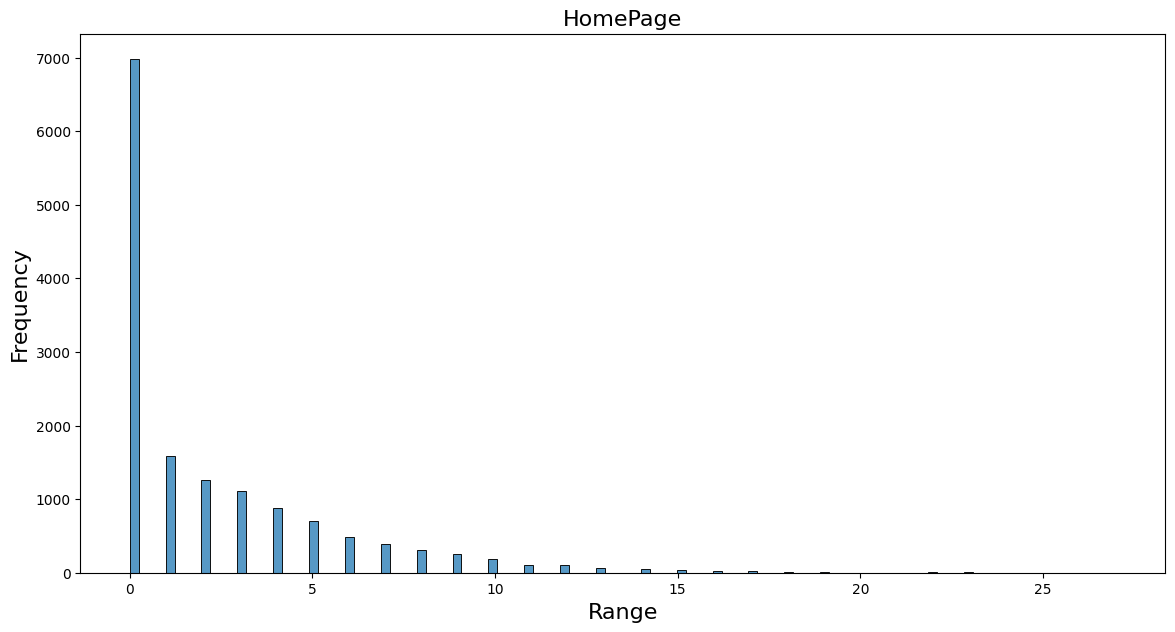

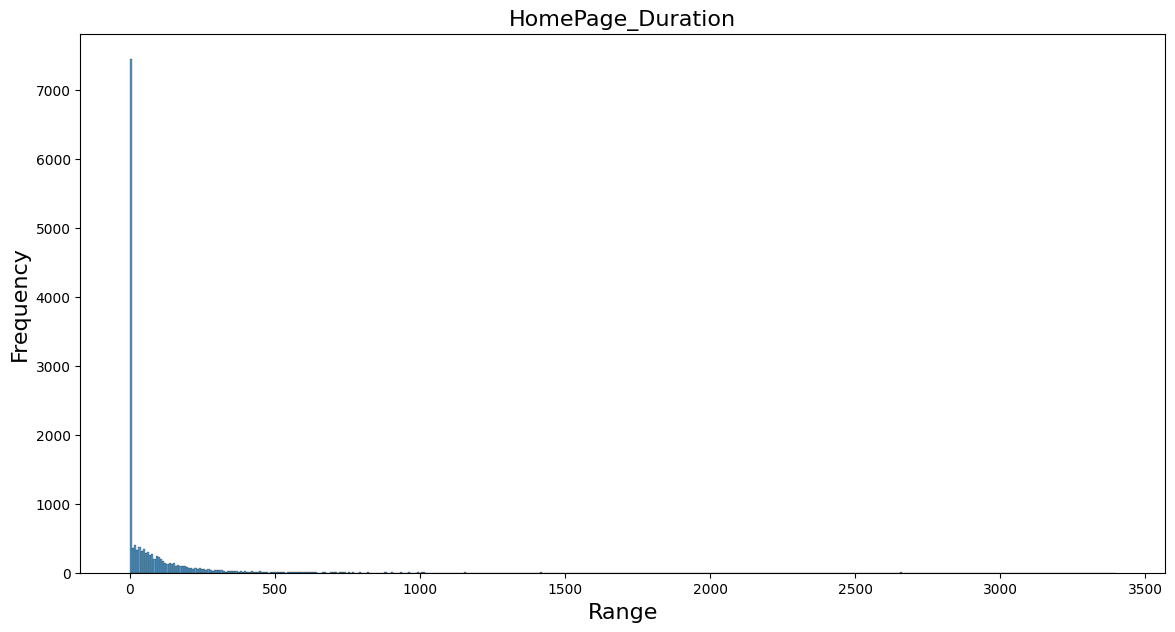

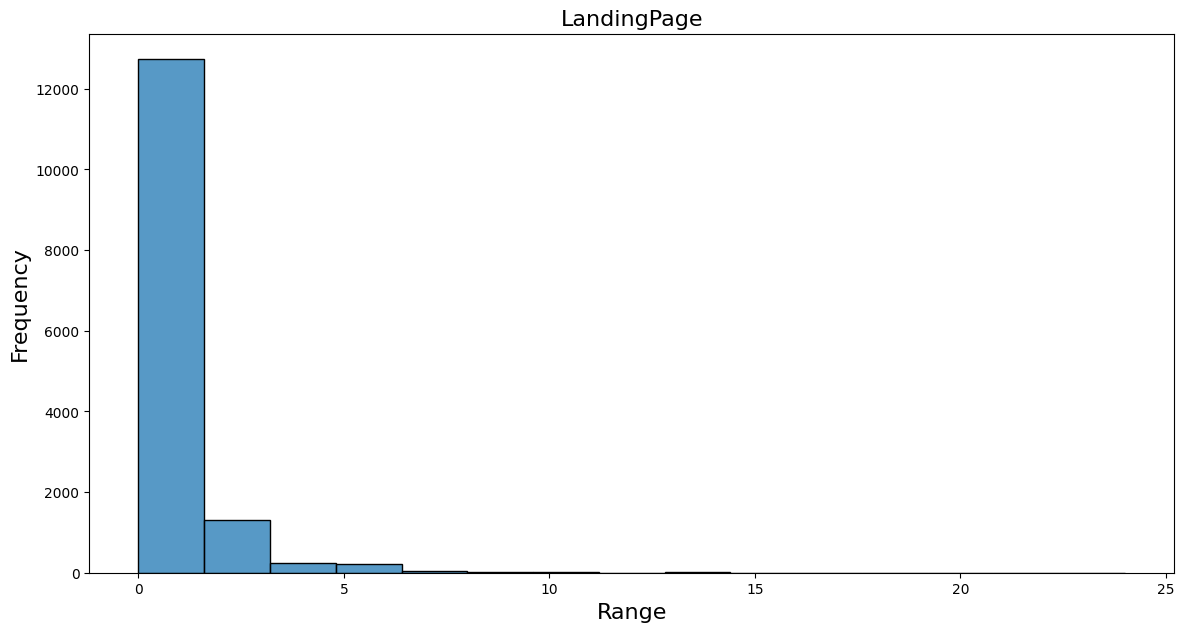

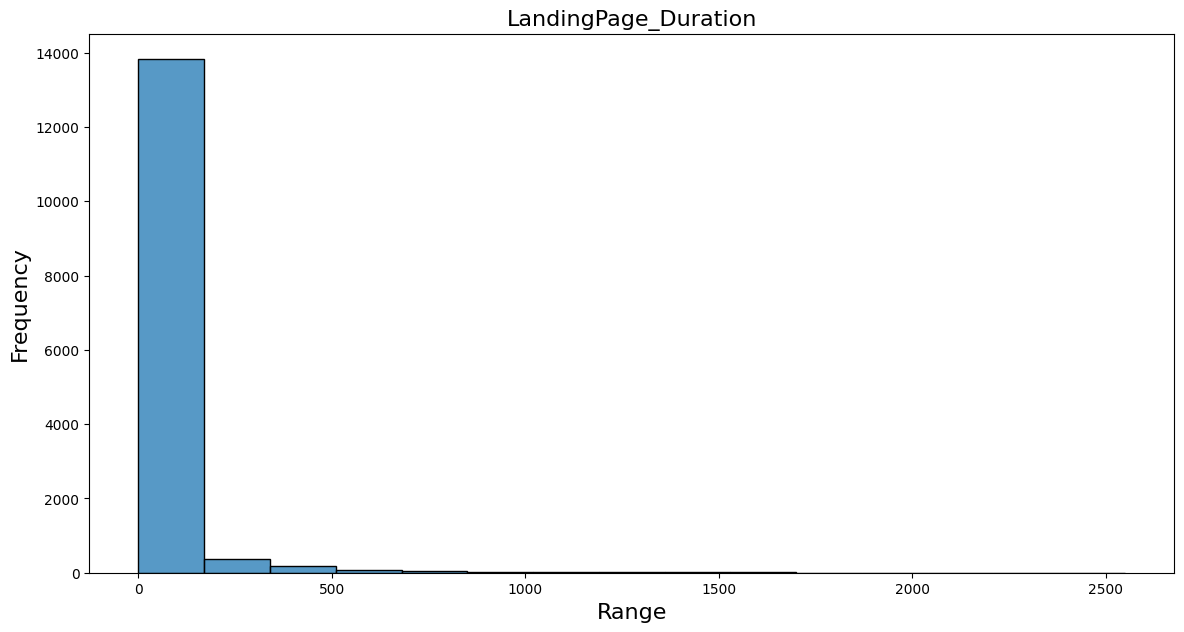

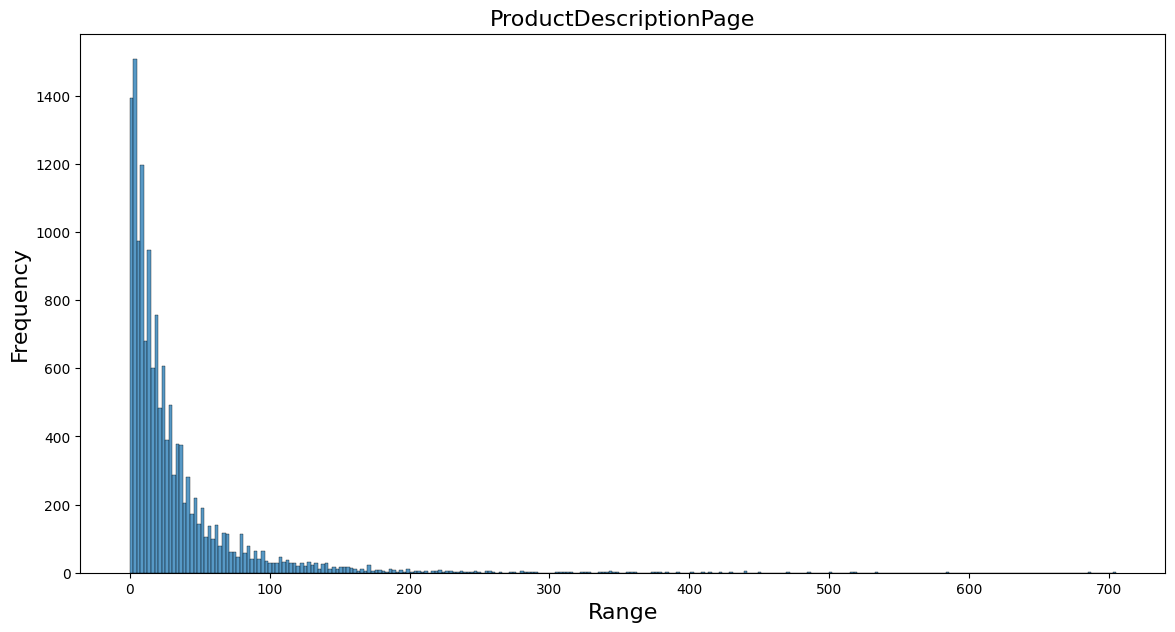

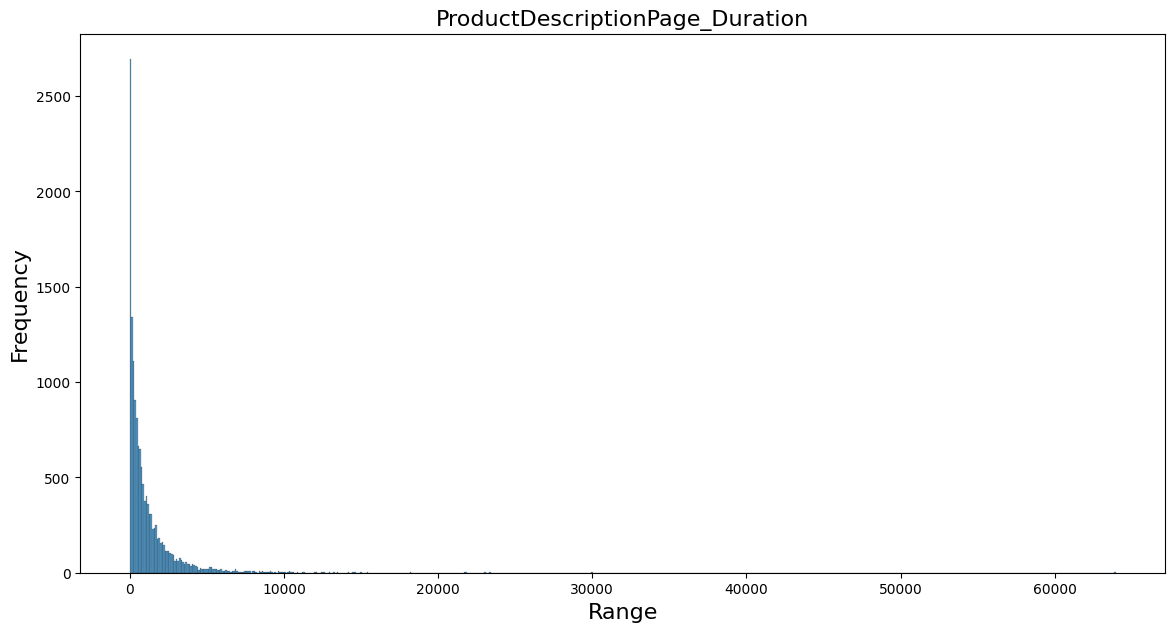

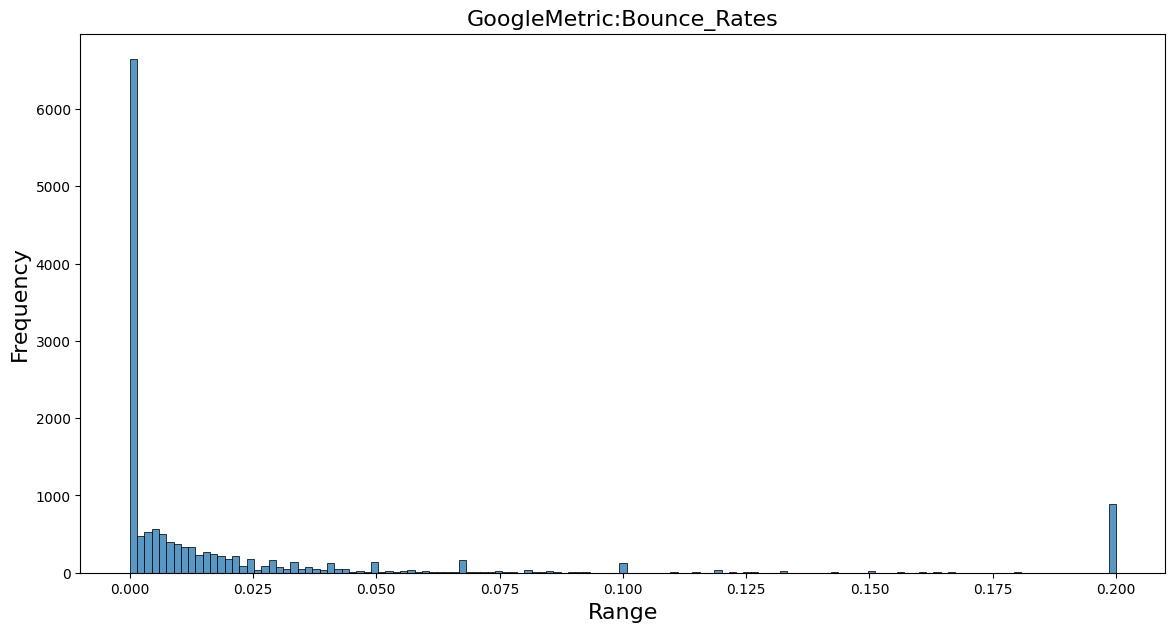

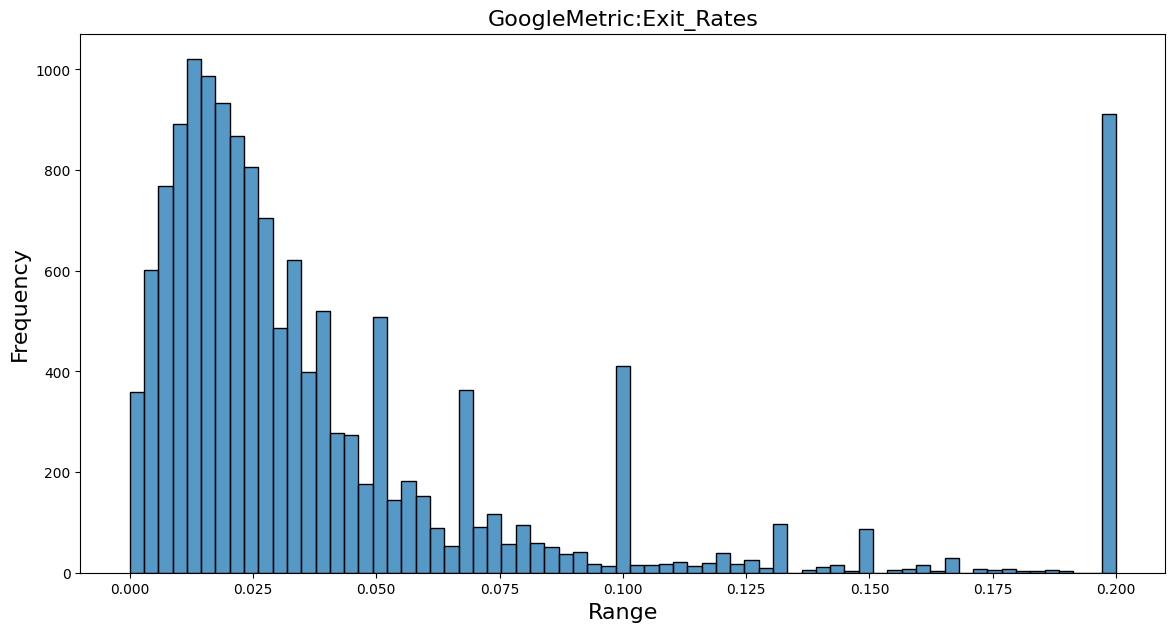

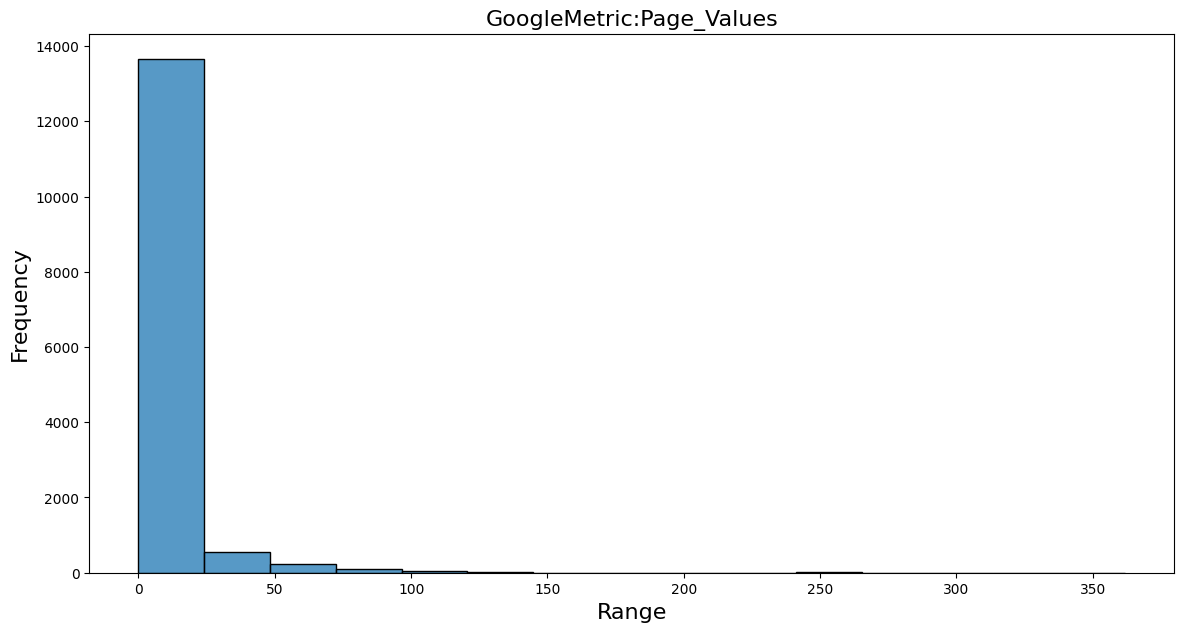

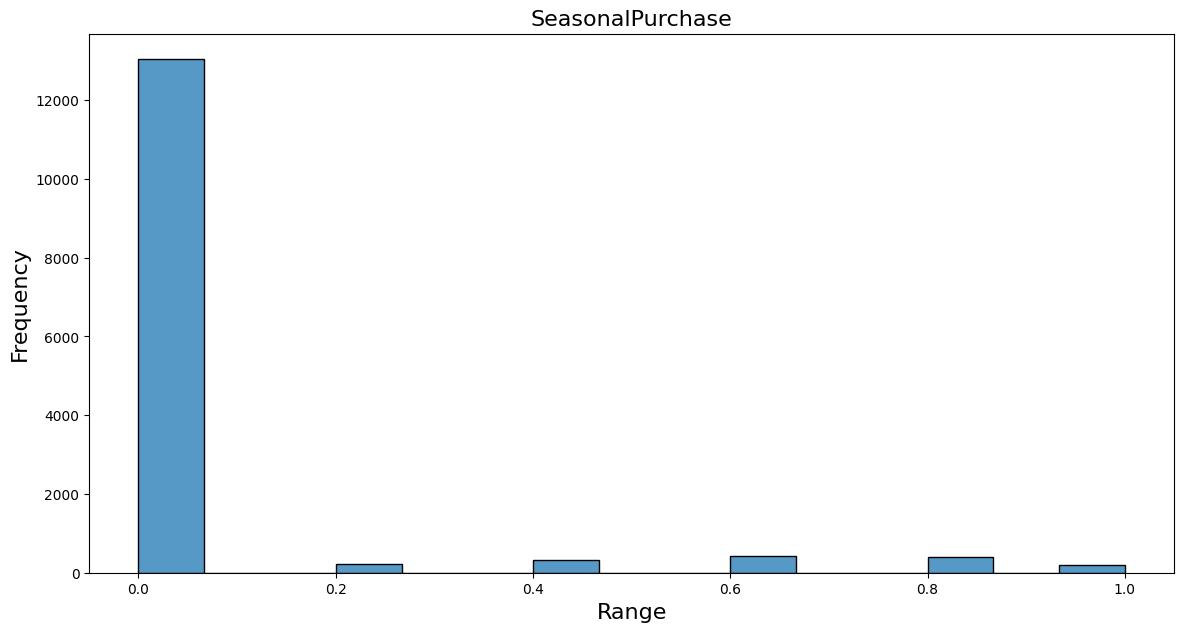

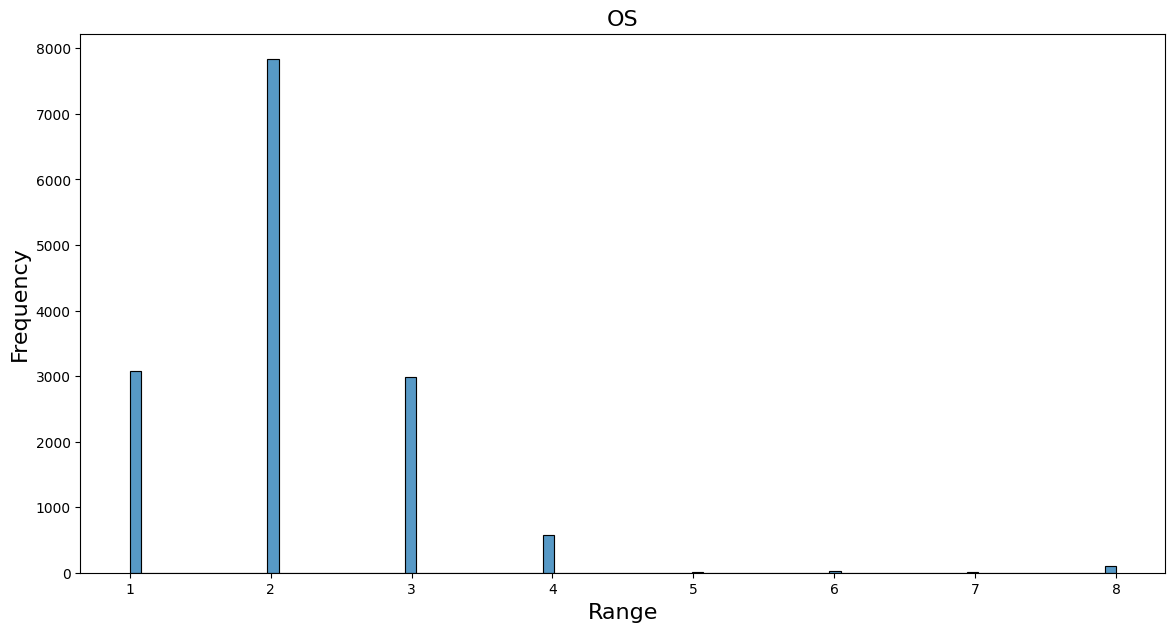

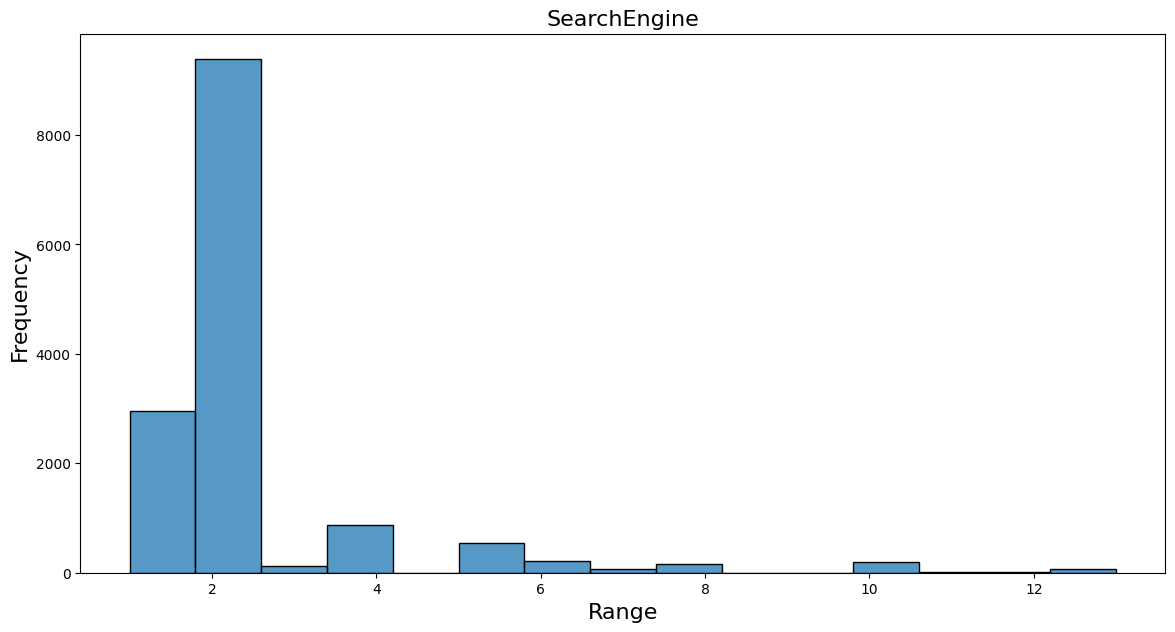

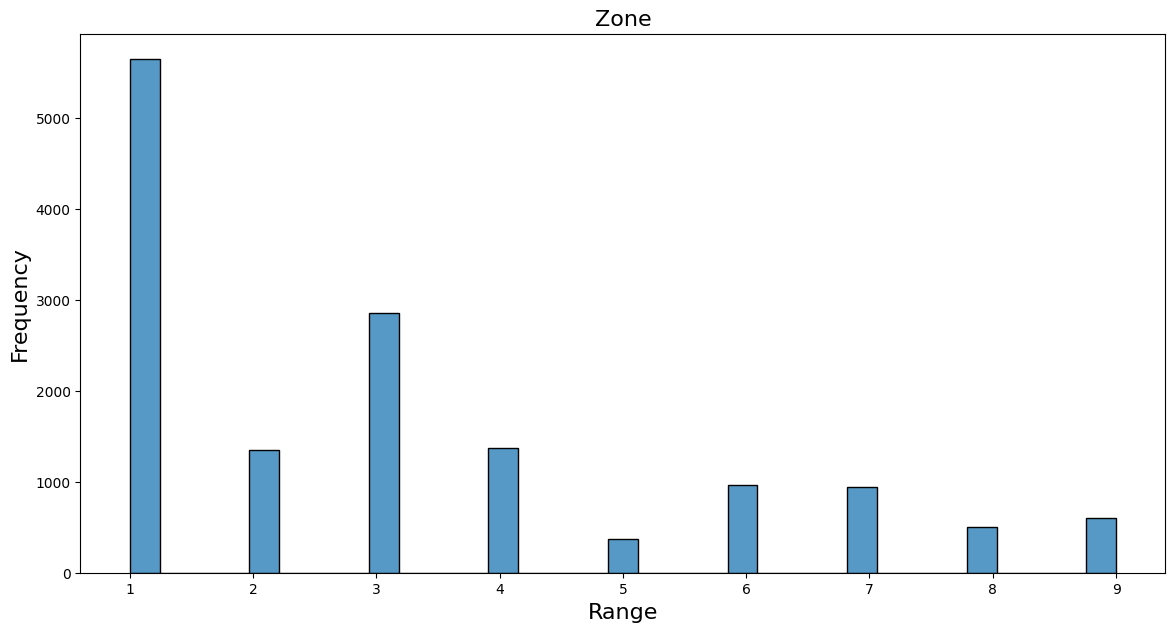

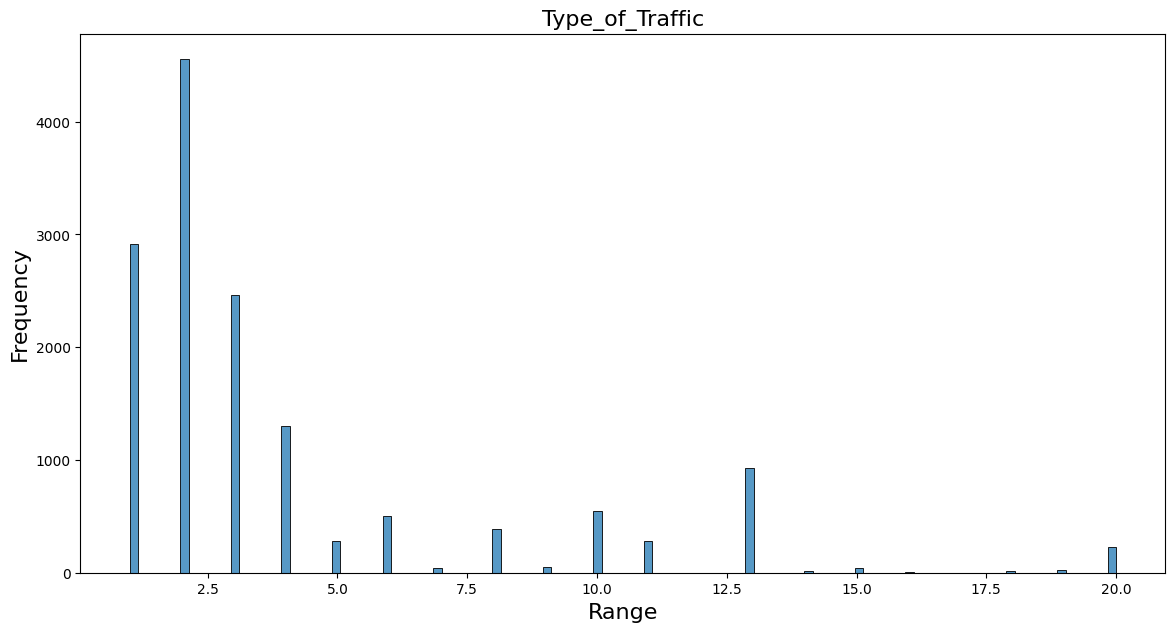

In [ ]:
for name in num_cols[0: len(num_cols)-1]:
    sns.histplot(X[name].values) # histogram plot
    plt.title(name, fontsize= 16)
    plt.xlabel('Range', fontsize= 16)
    plt.ylabel('Frequency', fontsize= 16)
    plt.show()

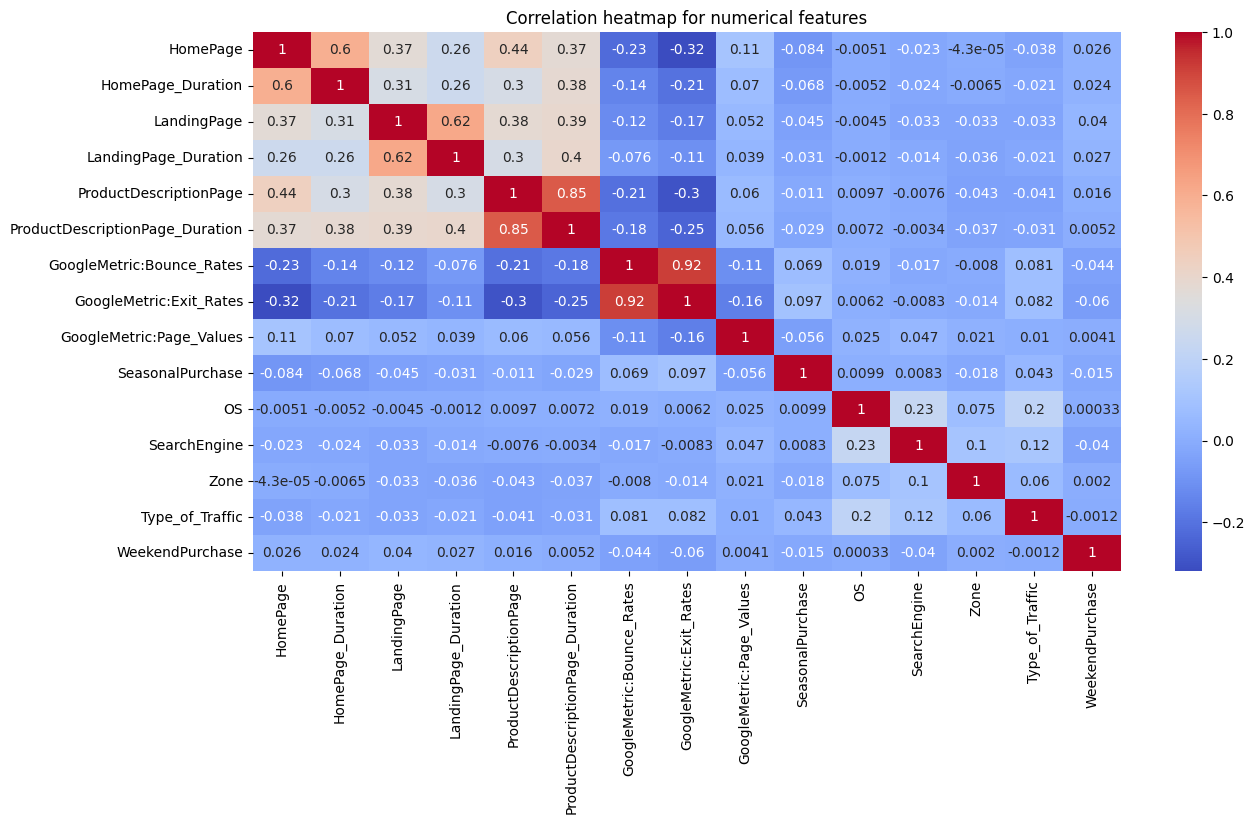

In [ ]:
# Correlation heatmap for numerical features

plt.figure(figsize=(14,7))

sns.heatmap(X[num_cols].corr(), cmap='coolwarm', annot=True)
plt.title("Correlation heatmap for numerical features")
plt.show()


In [ ]:
num_cols

['HomePage',
 'HomePage_Duration',
 'LandingPage',
 'LandingPage_Duration',
 'ProductDescriptionPage',
 'ProductDescriptionPage_Duration',
 'GoogleMetric:Bounce_Rates',
 'GoogleMetric:Exit_Rates',
 'GoogleMetric:Page_Values',
 'SeasonalPurchase',
 'OS',
 'SearchEngine',
 'Zone',
 'Type_of_Traffic',
 'WeekendPurchase']

Drop highly correlated features (> 0.6)

In [ ]:
X.drop(["HomePage_Duration", "LandingPage_Duration", "ProductDescriptionPage_Duration", "GoogleMetric:Exit_Rates"], axis=1, inplace=True)

In [ ]:
df_test.drop(["HomePage_Duration", "LandingPage_Duration", "ProductDescriptionPage_Duration", "GoogleMetric:Exit_Rates"], axis=1, inplace=True)

In [ ]:
to_remove = ["HomePage_Duration", "LandingPage_Duration", "ProductDescriptionPage_Duration", "GoogleMetric:Exit_Rates"]
num_cols = [_ for _ in num_cols if _ not in to_remove]


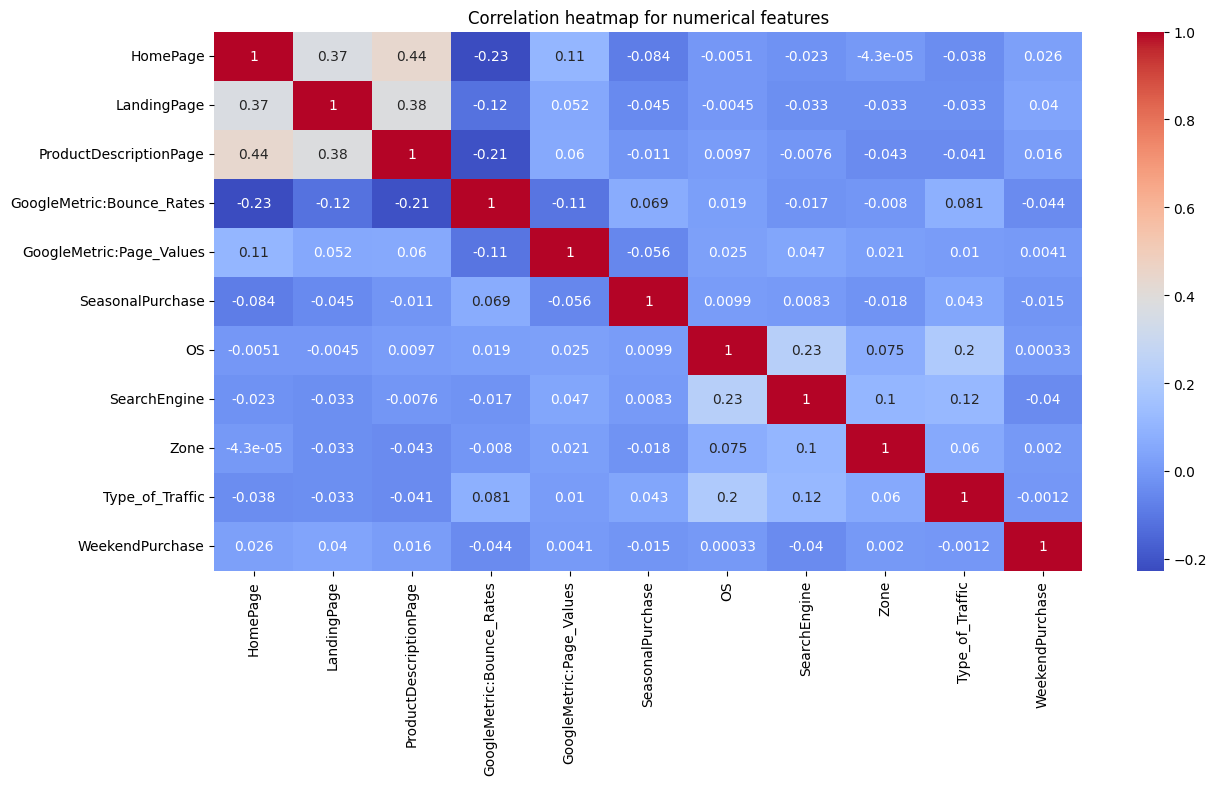

In [ ]:
# Correlation heatmap for numerical features

plt.figure(figsize=(14,7))

sns.heatmap(X[num_cols].corr(), cmap='coolwarm', annot=True)
plt.title("Correlation heatmap for numerical features")
plt.show()


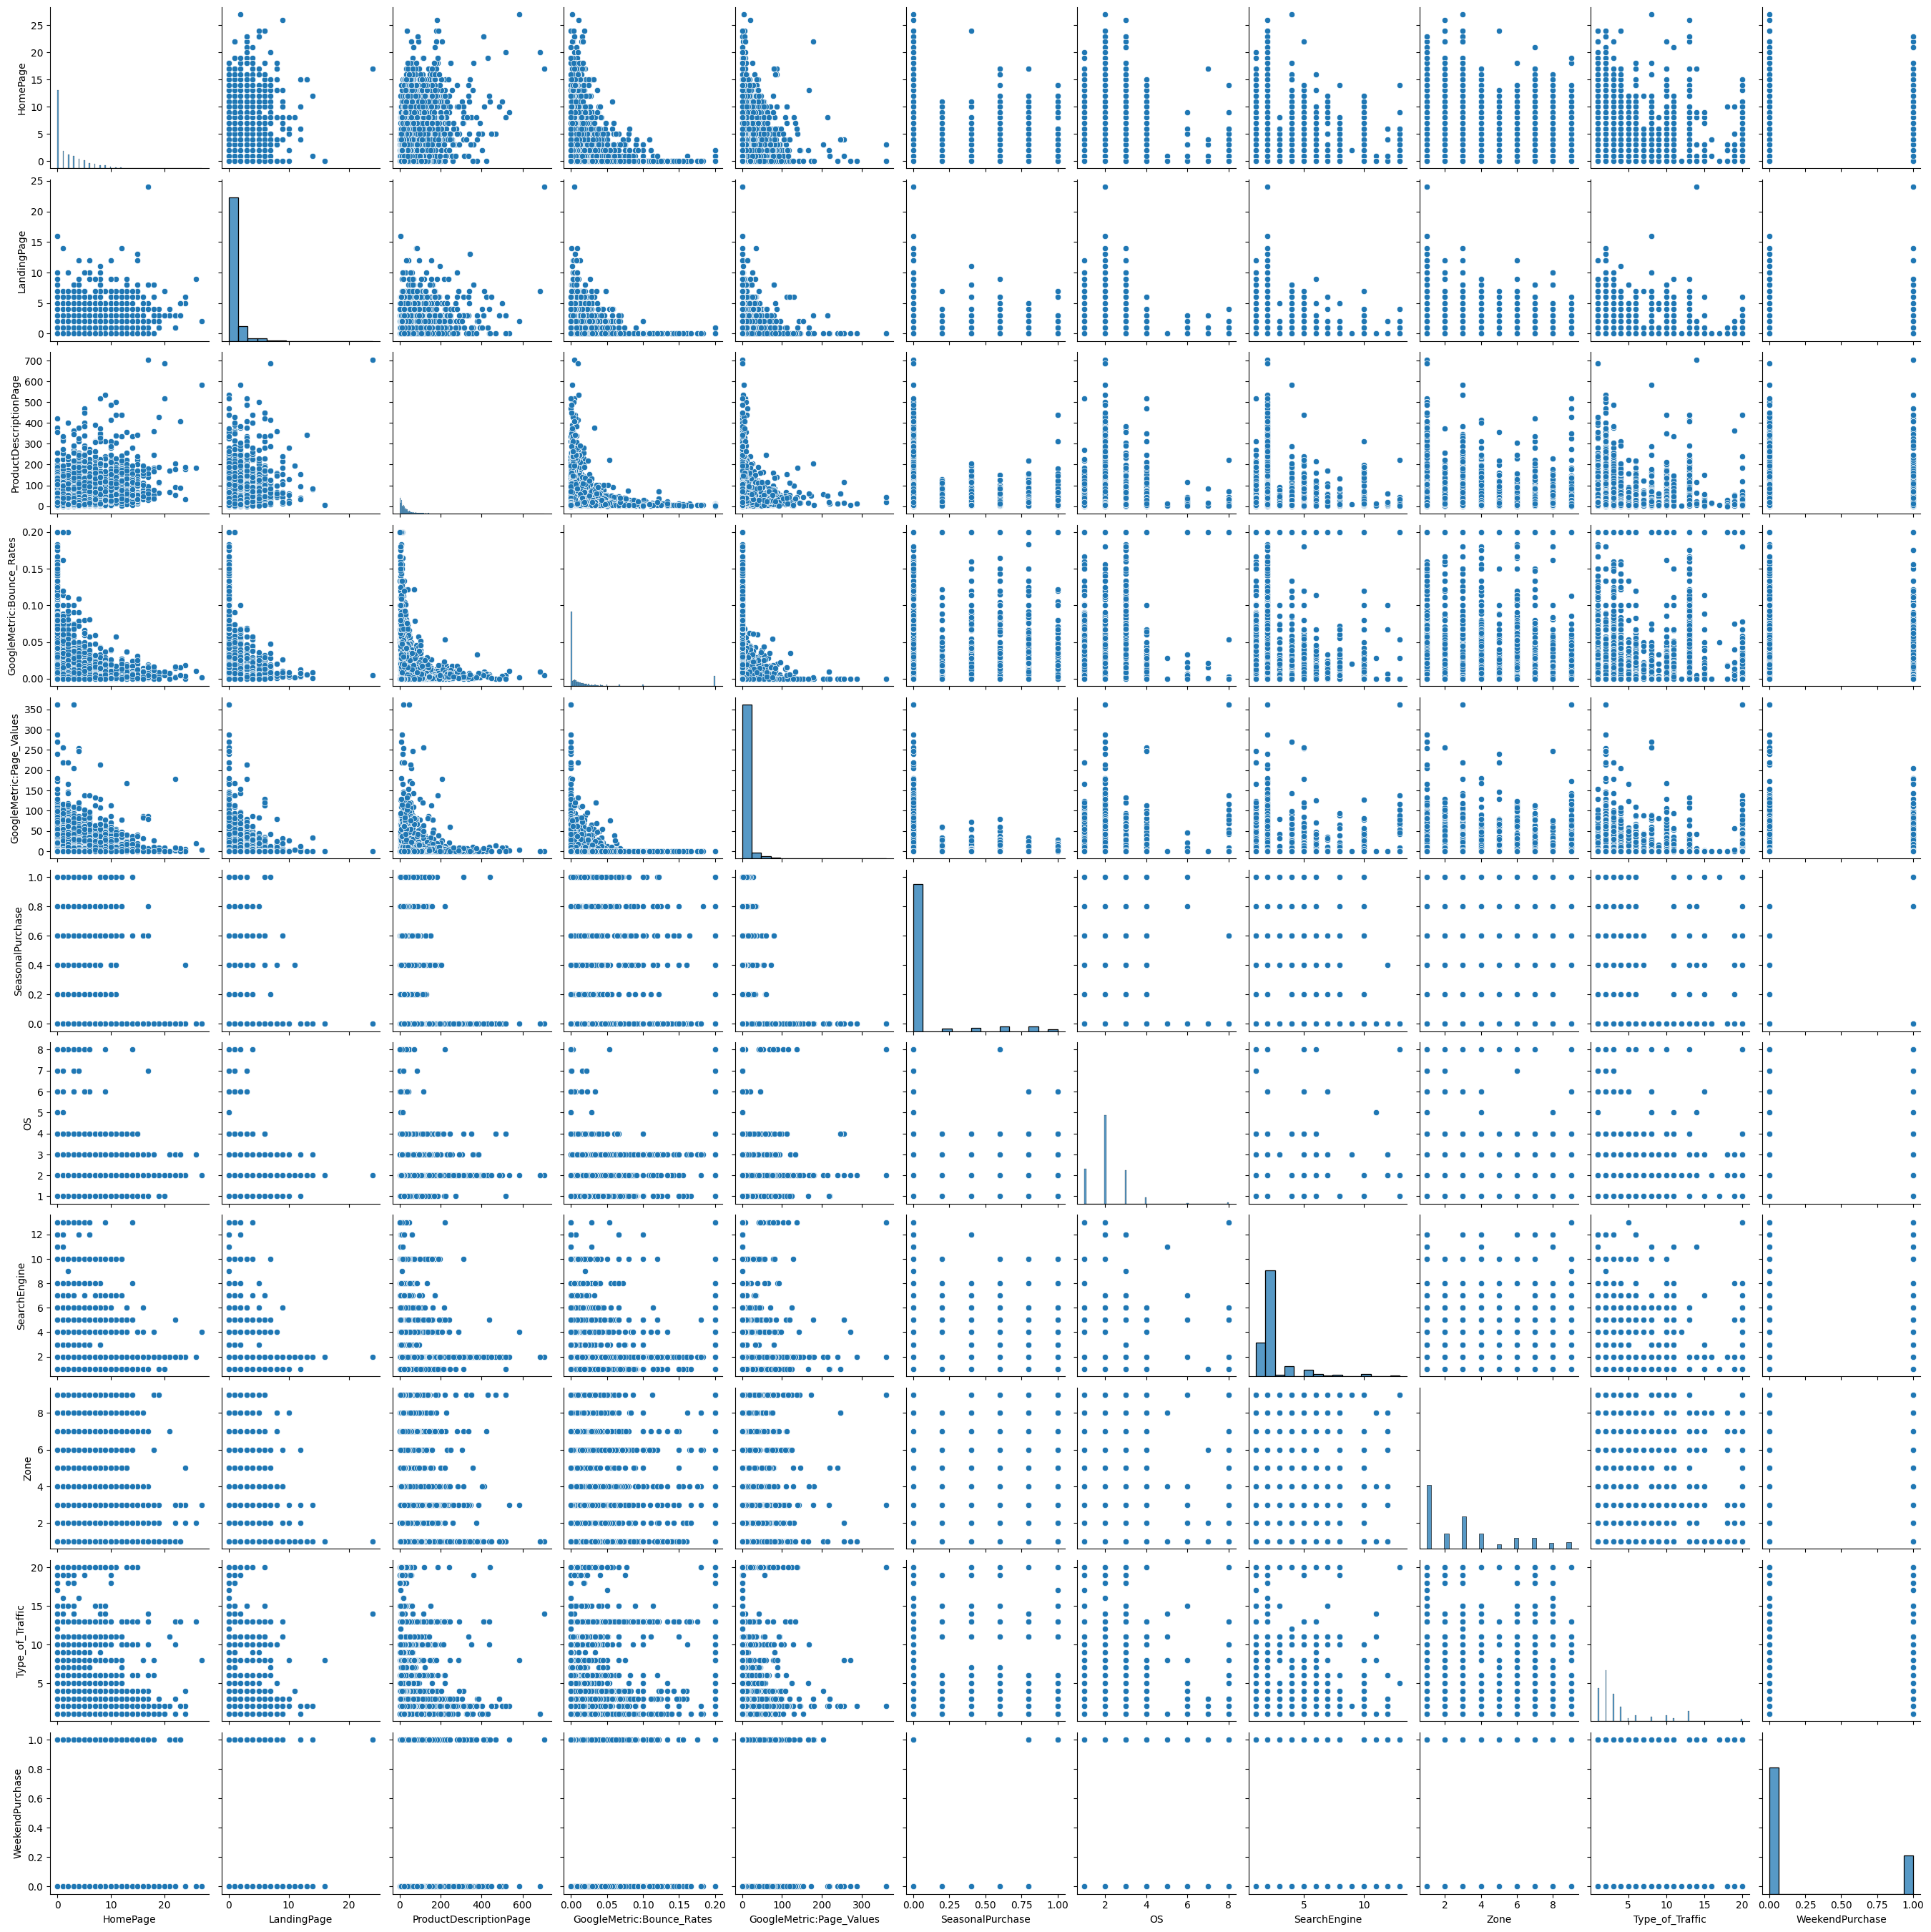

In [ ]:
sns.pairplot(X[num_cols])
plt.show()

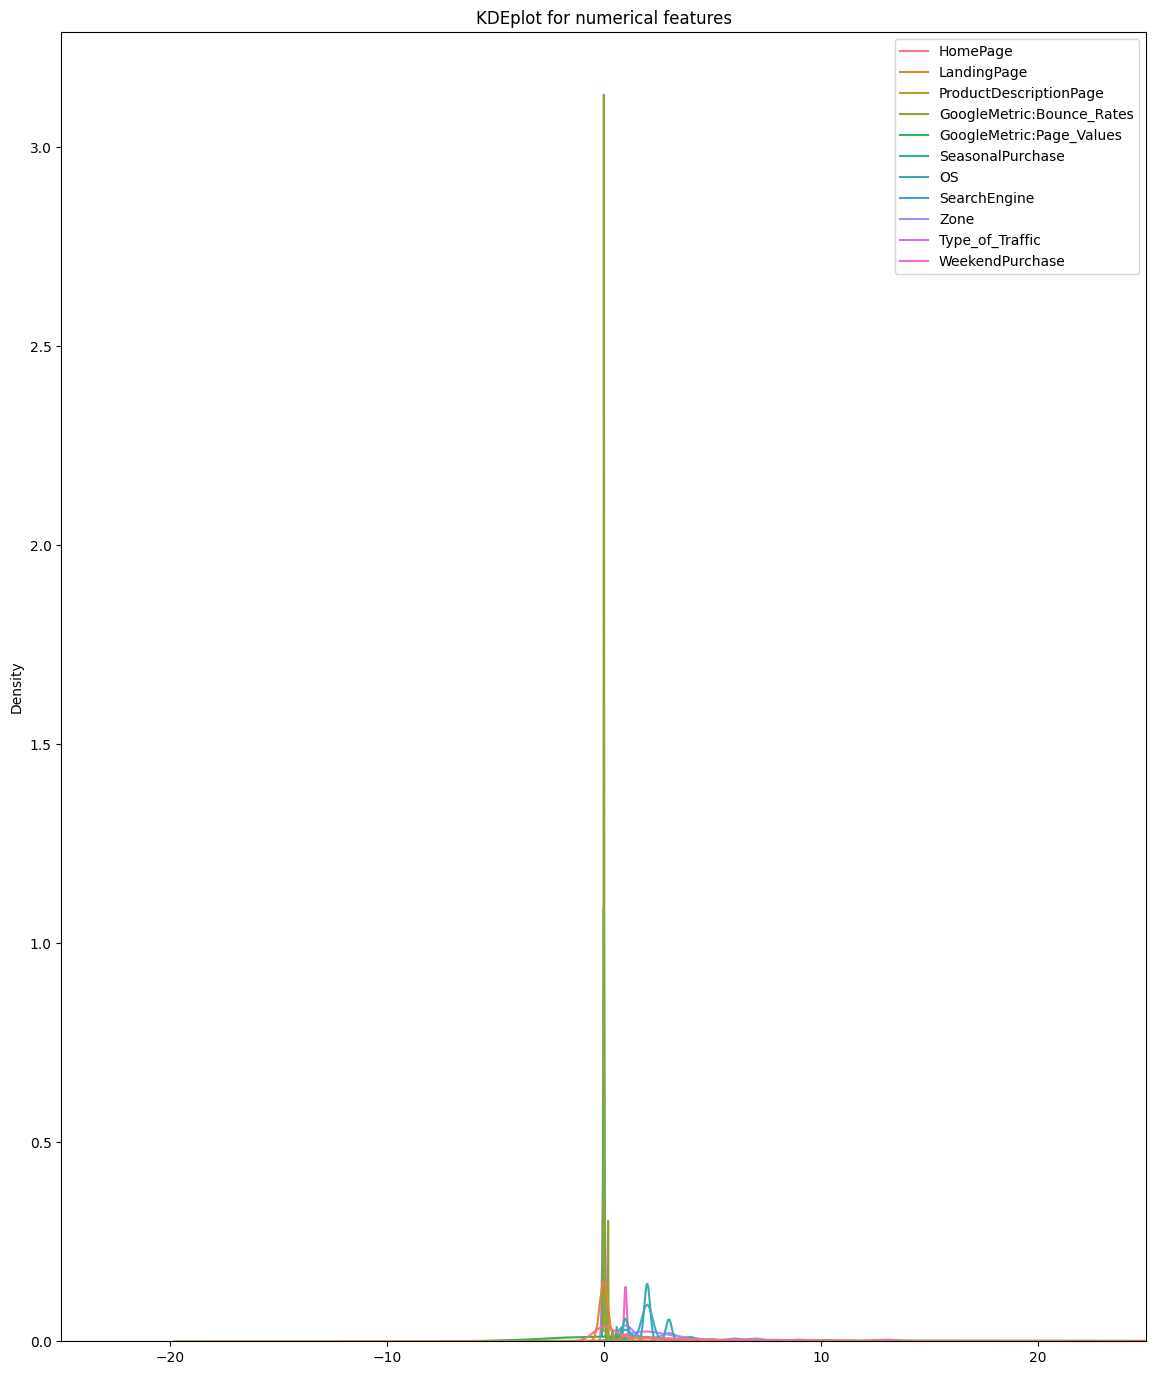

In [ ]:
# Kernel Density Estimate (KDE) plot
plt.figure(figsize=(14, 17))
plt.title("KDEplot for numerical features")
plt.xlim(-25, 25)
sns.kdeplot(data= X[num_cols])
plt.show()

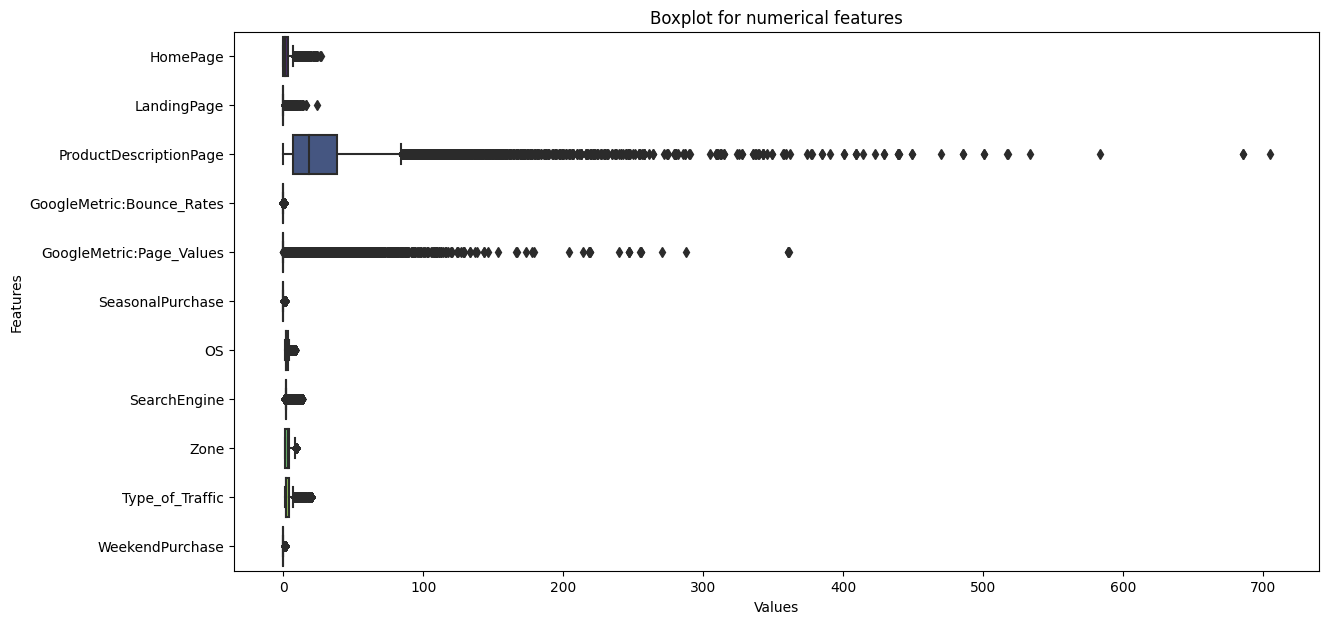

In [ ]:
## Boxplots
plt.figure(figsize=(14, 7))
sns.boxplot(data= X[num_cols], orient='horizontal', palette= 'viridis')
plt.title("Boxplot for numerical features")
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

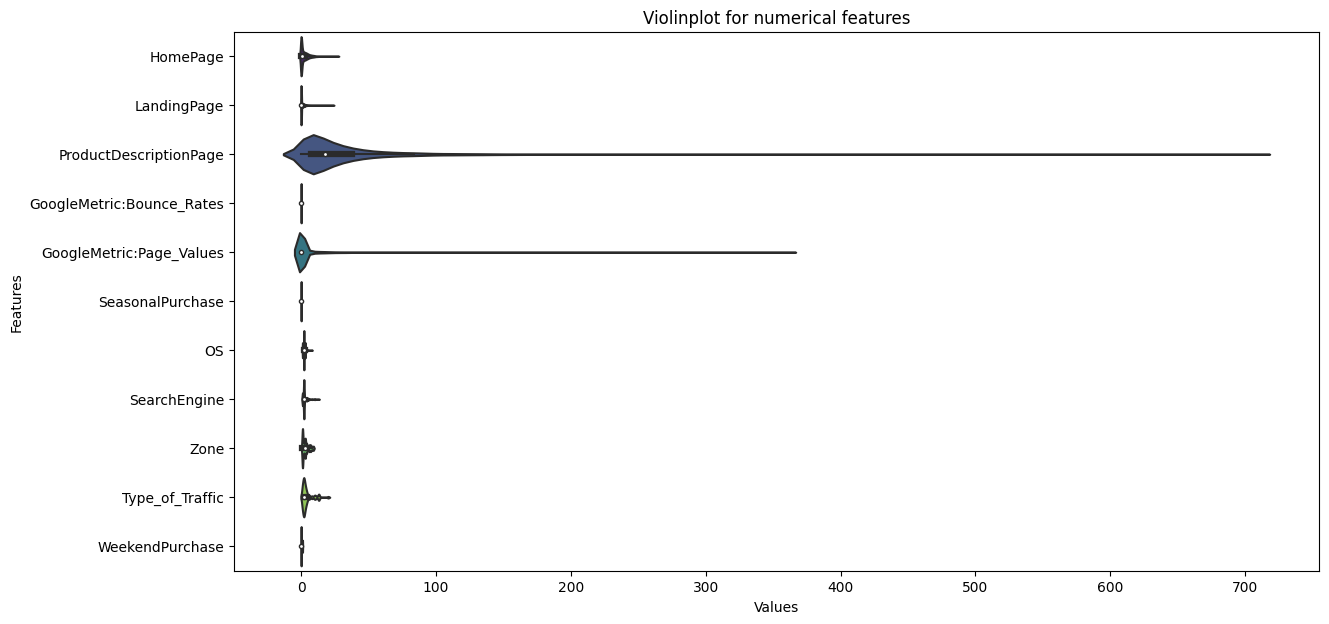

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(data= X[num_cols], orient='horizontal', palette= 'viridis', scale= 'width')
plt.title("Violinplot for numerical features")
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

#### Data Preprocessing

In [ ]:
 from sklearn.preprocessing import LabelEncoder
 label_encoder = LabelEncoder()
 y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

from sklearn.feature_selection import GenericUnivariateSelect, SelectKBest, RFE, SequentialFeatureSelector
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV,RandomizedSearchCV, train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, recall_score, accuracy_score, f1_score

from sklearn import set_config

from xgboost import XGBClassifier, XGBRFClassifier

from imblearn.pipeline import Pipeline as imb_pipeline
from imblearn.over_sampling import SMOTENC

!pip install optuna
!pip install catboost
import optuna
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 KB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.9 MB/s eta 0:00:00


In [ ]:
# Categorical encoding
categorical_transformers = Pipeline([
                                    ('selector', ColumnTransformer([
                                                                    ('select', 'passthrough', cat_cols)
                                                                    ])),
                                    ('cat_imputer', SimpleImputer(strategy= 'most_frequent')),                               
                                    ('one-hot', OneHotEncoder(handle_unknown= 'ignore', sparse= False))
                                    ])

#Scaling for numerical features
numerical_transformers = Pipeline([
                              ('selector', ColumnTransformer([
                                                             ('select', 'passthrough', num_cols)
                                                             ])),
                              ('num_imputer', SimpleImputer(strategy= 'median')),  
                              ('scaler', MinMaxScaler())
                              ])

#Data Preprocess Pipeline
preprocess_pipe = FeatureUnion(transformer_list=[
                                                     ('categorical', categorical_transformers),
                                                     ('numerical', numerical_transformers)
                                                     ])

In [ ]:
from sklearn import set_config
set_config(display= 'diagram')

# displays HTML representation 
preprocess_pipe



FeatureUnion(transformer_list=[('categorical',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select',
                                                                                  'passthrough',
                                                                                  ['Month_SeasonalPurchase',
                                                                                   'CustomerType',
                                                                                   'Gender',
                                                                                   'Cookies_Setting',
                                                                                   'Education',
                                                                                   'Marital_Status'])])),
                                                ('cat_imputer',
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('one-hot',
                                                 OneHotEncoder(handle_unknown='ignore',
                                                               sparse=False)...
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select',
                                                                                  'passthrough',
                                                                                  ['HomePage',
                                                                                   'LandingPage',
                                                                                   'ProductDescriptionPage',
                                                                                   'GoogleMetric:Bounce_Rates',
                                                                                   'GoogleMetric:Page_Values',
                                                                                   'SeasonalPurchase',
                                                                                   'OS',
                                                                                   'SearchEngine',
                                                                                   'Zone',
                                                                                   'Type_of_Traffic',
                                                                                   'WeekendPurchase'])])),
                                                ('num_imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('scaler', MinMaxScaler())]))])

#### Model Building

In [ ]:
def construct_pipeline(classifier, preprocessor):
    '''constructs pipeline object by combining a preprocessing stage and an estimator
    Args:
        classifier: Estimator object
        preprocessor: Preprocessing transformer object
        
    Returns:
        pipeline object
    '''
    full_pipe= Pipeline([
                        ('preprocess', preprocessor),
                        ('clf', classifier )
                        ])
    return full_pipe
    
def train_model(classifier, preprocessor, X_train, y_train):
    '''Trains a model with on given preprocssing and classification stages
    Args:
        classifier: Estimator object
        preprocessor: Preprocessing transformer object
        X_train: Training data feature matrix
        y_train: Training data label vector
        
    Returns:
        trained model
    '''
    X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                       test_size= 0.3,
                                                       stratify= y,
                                                       random_state= rng)
    
    full_pipe= construct_pipeline(classifier, preprocessor)
    full_pipe.fit(X_train, y_train)
    
    print("-------------------Metrics on training set --------------------------")
    y_train_pred = full_pipe.predict(X_train)
    print("F1 score on training set: ", f1_score(y_train, y_train_pred, average='micro'))
    print()
    print(classification_report(y_train, y_train_pred))

    
    print("-------------------Metrics on test set --------------------------")
    y_test_pred = full_pipe.predict(X_test)
    print("F1 score on test set: " ,f1_score(y_test, y_test_pred, average='micro'))
    print()
    print(classification_report(y_test, y_test_pred))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    
    return full_pipe

    
def tune_model(model,
               param_grid,
               X_train, y_train,
               cv= StratifiedShuffleSplit(n_splits = 10, 
                                          test_size= 0.3,
                                          random_state= rng)):
    '''Do hyper parameter tuning using RandomizedSearchCV strategy
    
    Args:
        model: Model to be tuned
        param_grid: dict of parameters
        X_train: Feature matrix
        y_train: Label matrix
        
    Returns: 
        best parameters
        best estimator
    '''
    search= RandomizedSearchCV(model, 
                          param_distributions= param_grid,
                          cv= cv,
                          scoring= 'f1_micro',
                          n_jobs= -1,
                          return_train_score= True,
                          random_state= rng)
    search.fit(X_train, y_train)
    
    print("Best parameters: ", search.best_params_)
    print("-------------------Best model performance --------------------------")
    
    mean_train_score= search.cv_results_['mean_train_score'][search.best_index_]
    mean_test_score= search.cv_results_['mean_test_score'][search.best_index_]
    std_train_score= search.cv_results_['std_train_score'][search.best_index_]
    std_test_score= search.cv_results_['std_test_score'][search.best_index_]

    print(f"Score of the model on the train set:\n"
        f"{mean_train_score:.3f} +/- {std_train_score:.6f}")

    print(f"Score of the model on the test set:\n"
        f"{mean_test_score:.3f} +/- {std_test_score:.6f}")
    
    y_pred = search.best_estimator_.predict(X_train)
    print(classification_report(y_train, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
    
    print("------------------------------------------------------------------")
    
    return search.best_estimator_

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, stratify= y, random_state= rng)
# data preprocessing
X_train = preprocess_pipe.fit_transform(X_train)
X_test = preprocess_pipe.transform(X_test)
print(X_train.shape, X_test.shape)

(10311, 30) (4419, 30)


#### Spot-Check model performance (without hyperparameter tuning)

In [ ]:
# model params
lgbm_params = {
    'device_type' : 'gpu'
}

catb_params = {
    'task_type' : 'GPU',
    'devices' : '0',
    'verbose' : 0
}

xgb_params = {
    'predictor': 'gpu_predictor',
    'tree_method': 'gpu_hist',
    'gpu_id' : 0,
    'verbosity': 0
}

In [ ]:
models = [
    ('KNN', KNeighborsClassifier()),
    ('LogReg', LogisticRegression(random_state=0)),
    ('SVM', SVC(random_state=0)),
    ('DT', DecisionTreeClassifier(random_state=0)),
    ('RF', RandomForestClassifier(random_state=0)),
    ('ET', ExtraTreesClassifier(random_state=0)),
    ('Ada', AdaBoostClassifier(random_state=0)),
    ('GradBoost', GradientBoostingClassifier(random_state=0)),    
    # ('LGBM', LGBMClassifier	(**lgbm_params)),
    # ('CATB', CatBoostClassifier(**catb_params)),
    # ('XGB', XGBClassifier(**xgb_params)),
   
]

scores = dict()

for name, model in models:
    y_hat = model.fit(X_train, y_train).predict(X_test)
    scores[name] = f1_score(y_test, y_hat, average="micro")

In [ ]:
scores_df = pd.DataFrame([scores]).T.rename(columns={0:"F1-Score"})
scores_df.sort_values("F1-Score", ascending=False)

,F1-Score
GradBoost,0.662367
Ada,0.661688
LogReg,0.654673
SVM,0.621634
RF,0.534963
KNN,0.524553
ET,0.521159
DT,0.479520


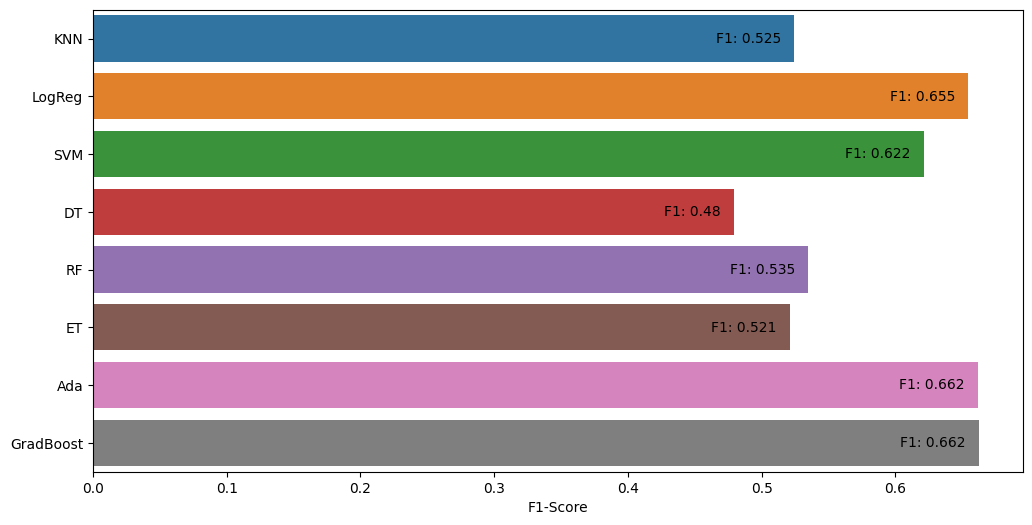

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(
    data=scores_df,
    x="F1-Score",
    y=scores_df.index,
    orient="h",
    ax=ax
)

for idx in range(0, len(scores_df)):
    x = scores_df["F1-Score"][idx]
    ax.annotate(
        text=f"F1: {np.round(x,3)}",
        xy=(x-0.01, idx),
        va='center', ha='right'
    )
    
plt.show()

We select GradBoost, AdaBoost, CatBoost, LogReg and tune their parameters

Logistic Regression

-------------------Metrics on training set --------------------------
F1 score on training set:  0.6537678207739308

              precision    recall  f1-score   support

           0       0.65      0.96      0.77      6345
           1       0.73      0.16      0.26      3966

    accuracy                           0.65     10311
   macro avg       0.69      0.56      0.52     10311
weighted avg       0.68      0.65      0.58     10311

-------------------Metrics on test set --------------------------
F1 score on test set:  0.6548992984838199

              precision    recall  f1-score   support

           0       0.65      0.96      0.77      2719
           1       0.73      0.16      0.26      1700

    accuracy                           0.65      4419
   macro avg       0.69      0.56      0.52      4419
weighted avg       0.68      0.65      0.58      4419



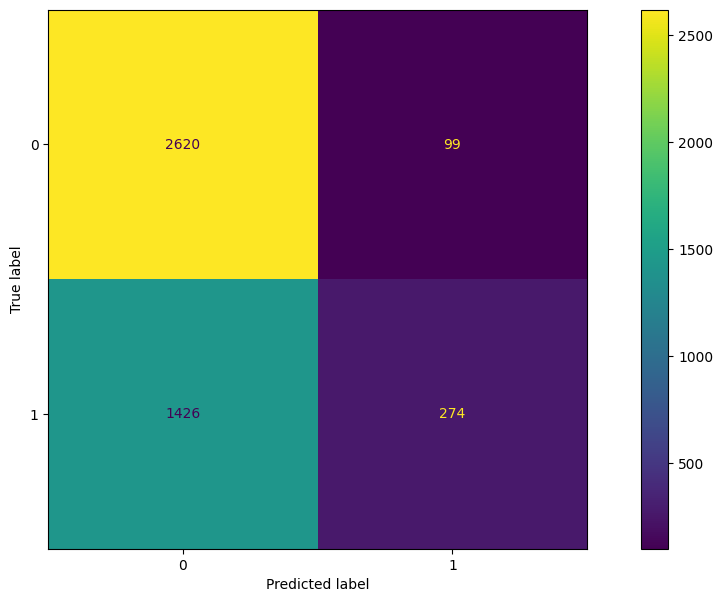

In [ ]:
logreg_clf= LogisticRegression(random_state= rng, max_iter= 4000)
logreg_clf_model= train_model(logreg_clf, preprocess_pipe, X, y)

Best parameters:  {'clf__l1_ratio': 0.7, 'clf__C': 100}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.657 +/- 0.001560
Score of the model on the test set:
0.656 +/- 0.003830
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      9064
           1       0.71      0.18      0.29      5666

    accuracy                           0.66     14730
   macro avg       0.68      0.57      0.53     14730
weighted avg       0.67      0.66      0.59     14730

------------------------------------------------------------------


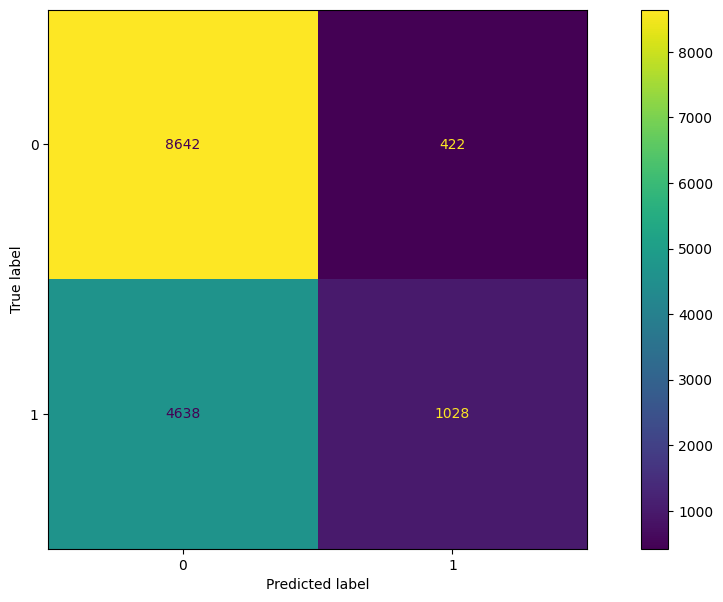

In [ ]:
logreg_clf_pipe= construct_pipeline(LogisticRegression(
    penalty= 'elasticnet',
    solver='saga', 
    max_iter=4000,
    random_state= rng), 
    preprocess_pipe)

param_grid = {'clf__C': ( 0.001, 0.01, 0.1, 1, 10, 100),
             'clf__l1_ratio': (0, 0.1, 0.3, 0.5, 0.7, 0.9, 1)}
             
logreg_clf_model_tuned= tune_model(logreg_clf_pipe, param_grid, X, y)

Gradient Boosting 

-------------------Metrics on training set --------------------------
F1 score on training set:  0.6840267675298225

              precision    recall  f1-score   support

           0       0.68      0.93      0.78      6345
           1       0.72      0.29      0.41      3966

    accuracy                           0.68     10311
   macro avg       0.70      0.61      0.60     10311
weighted avg       0.70      0.68      0.64     10311

-------------------Metrics on test set --------------------------
F1 score on test set:  0.6628196424530437

              precision    recall  f1-score   support

           0       0.66      0.91      0.77      2719
           1       0.65      0.26      0.37      1700

    accuracy                           0.66      4419
   macro avg       0.66      0.59      0.57      4419
weighted avg       0.66      0.66      0.62      4419



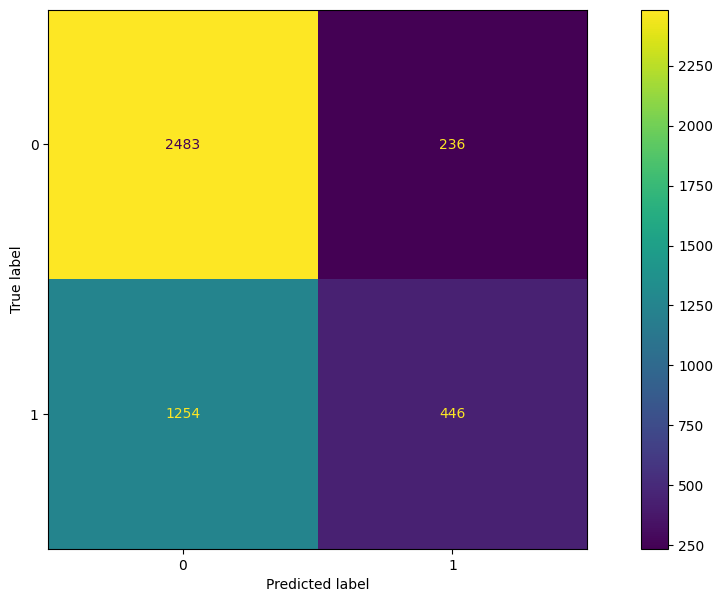

In [ ]:
gradboost_clf= GradientBoostingClassifier(random_state= rng)
gradboost_clf_model= train_model(gradboost_clf, preprocess_pipe, X, y)

Best parameters:  {'clf__n_estimators': 50, 'clf__learning_rate': 0.1}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.679 +/- 0.002288
Score of the model on the test set:
0.665 +/- 0.006023
              precision    recall  f1-score   support

           0       0.67      0.92      0.78      9064
           1       0.69      0.28      0.40      5666

    accuracy                           0.67     14730
   macro avg       0.68      0.60      0.59     14730
weighted avg       0.68      0.67      0.63     14730

------------------------------------------------------------------


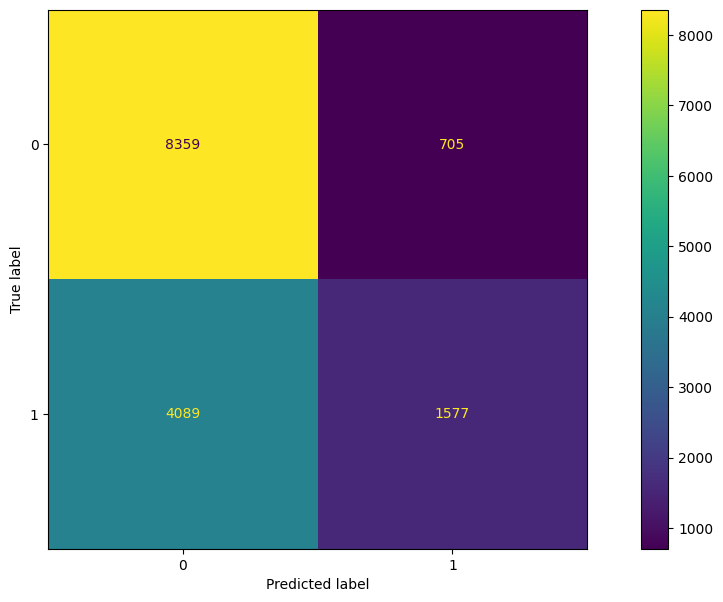

In [ ]:
gradboost_clf_pipe = construct_pipeline(gradboost_clf, preprocess_pipe)
param_grid = {
             'clf__n_estimators': (50, 100, 150, 200),
             'clf__learning_rate': (1e-3, 1e-2, 1e-1, 1)
             }
gradboost_clf_model_tuned= tune_model(gradboost_clf_pipe, param_grid, X, y)

AdaBoost 

-------------------Metrics on training set --------------------------
F1 score on training set:  0.6702550674037435

              precision    recall  f1-score   support

           0       0.67      0.90      0.77      6345
           1       0.66      0.30      0.41      3966

    accuracy                           0.67     10311
   macro avg       0.67      0.60      0.59     10311
weighted avg       0.67      0.67      0.63     10311

-------------------Metrics on test set --------------------------
F1 score on test set:  0.6616881647431545

              precision    recall  f1-score   support

           0       0.67      0.90      0.77      2719
           1       0.63      0.29      0.39      1700

    accuracy                           0.66      4419
   macro avg       0.65      0.59      0.58      4419
weighted avg       0.65      0.66      0.62      4419



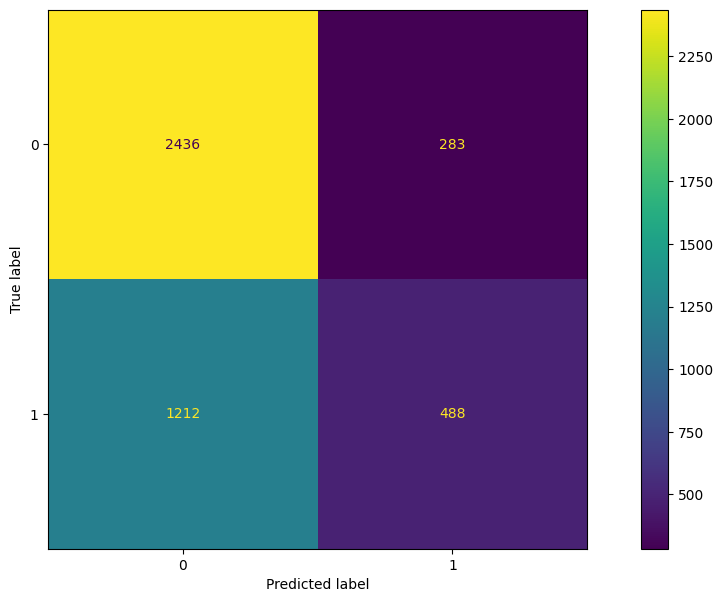

In [ ]:
ada_clf= AdaBoostClassifier(random_state= rng)
ada_clf_model= train_model(ada_clf, preprocess_pipe, X, y)

Best parameters:  {'clf__n_estimators': 75, 'clf__learning_rate': 0.1}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.669 +/- 0.002437
Score of the model on the test set:
0.665 +/- 0.005703
              precision    recall  f1-score   support

           0       0.67      0.91      0.77      9064
           1       0.66      0.28      0.39      5666

    accuracy                           0.67     14730
   macro avg       0.67      0.60      0.58     14730
weighted avg       0.67      0.67      0.63     14730

------------------------------------------------------------------


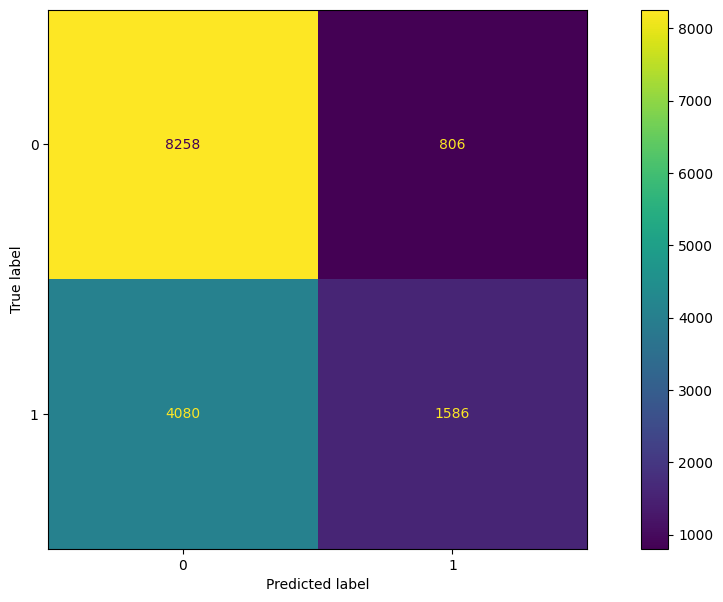

In [ ]:
ada_clf_pipe= construct_pipeline(ada_clf, preprocess_pipe)
param_grid = {
            'clf__n_estimators': (50, 75, 100, 125, 150),
            'clf__learning_rate': (1e-3, 1e-2, 1e-1, 1)
            }
ada_clf_model_tuned= tune_model(ada_clf_pipe, param_grid, X, y)

CatBoost

In [ ]:
gradboost_best_params = {'n_estimators': 50,
                         'learning_rate': 0.1
                   }

adaboost_best_params = {'n_estimators': 75,
                        'learning_rate': 0.1
                       }

logreg_best_params = {'l1_ratio': 0.7,
                      'C': 100
                     }

# catboost_best_params = {'learning_rate': 0.01,
#                         'iterations': 130, 
#                         'depth': 6}

##### Stacking Classifier

In [ ]:
estimators = [
    ('gradboost', GradientBoostingClassifier(**gradboost_best_params,
                                             random_state= rng
                                            )),
    
    ('adaboost', AdaBoostClassifier(**adaboost_best_params,
                                    random_state= rng,
                                   ))]
    # ('catboost', CatBoostClassifier(**catboost_best_params,
    #                                **catb_params,
    #                                random_state=rng
    #                                ))]
                 

-------------------Metrics on training set --------------------------
F1 score on training set:  0.6757831442149161

              precision    recall  f1-score   support

           0       0.67      0.92      0.78      6345
           1       0.69      0.29      0.40      3966

    accuracy                           0.68     10311
   macro avg       0.68      0.60      0.59     10311
weighted avg       0.68      0.68      0.63     10311

-------------------Metrics on test set --------------------------
F1 score on test set:  0.664856302330844

              precision    recall  f1-score   support

           0       0.67      0.91      0.77      2719
           1       0.65      0.28      0.39      1700

    accuracy                           0.66      4419
   macro avg       0.66      0.59      0.58      4419
weighted avg       0.66      0.66      0.62      4419



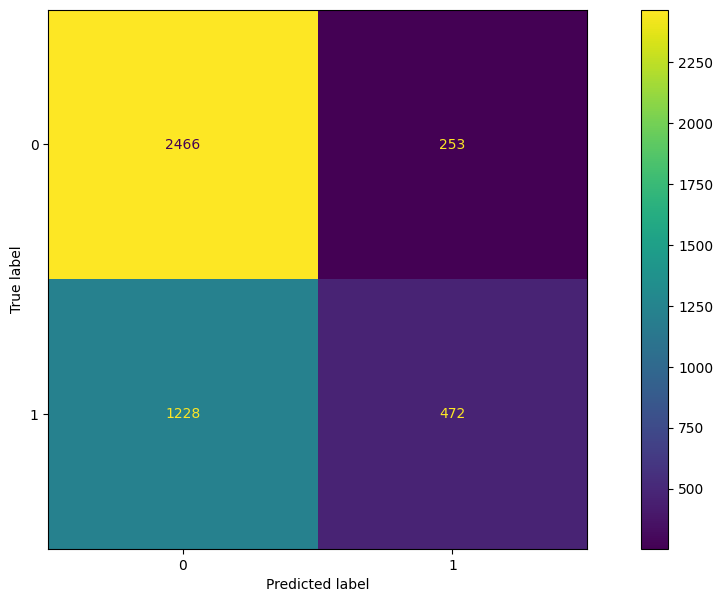

In [ ]:
stack_clf= train_model(StackingClassifier(estimators=estimators, 
                                          final_estimator=LogisticRegression(**logreg_best_params,
                                                                            random_state=rng)),
                       preprocess_pipe,
                       X, y)

In [ ]:
prediction = stack_clf.predict(df_test)

In [ ]:
prediction.shape

(6599,)

In [ ]:
prediction = label_encoder.inverse_transform(prediction)

In [ ]:
submission = pd.DataFrame(columns = ['id', 'Made_Purchase'])
submission['id'] = [_ for _ in range(len(prediction))]
submission['Made_Purchase'] = prediction

In [ ]:
submission.head()

,id,Made_Purchase
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
submission.to_csv('submission.csv', index = False)